# **Import Library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [84]:
# Machine Learning Library
import tensorflow as tf

# Image Processing Libraries
import cv2
import dlib
import numpy as np
from PIL import Image

# File Handling & OS Utilities
import os

# Visualization
import matplotlib.pyplot as plt

# Google Colab Utility
from google.colab import files

In [3]:
face_shape_path = './drive/MyDrive/Hijabist-Drive/Face-shape/Model keras/Face-shape-model.keras'
skin_tone_path = './drive/MyDrive/Hijabist-Drive/Skin-tone/Model keras/Skin-tone-model.keras'

# Load model
face_shape_model = tf.keras.models.load_model(face_shape_path)
skin_tone_model = tf.keras.models.load_model(skin_tone_path)

In [5]:
face_shape_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 7,199,569 (27.46 MB)

 Trainable params: 2,388,485 (9.11 MB)

 Non-trainable params: 34,112 (133.25 KB)

 Optimizer params: 4,776,972 (18.22 MB)

In [6]:
skin_tone_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 10,530,254 (40.17 MB)

 Trainable params: 3,502,788 (13.36 MB)

 Non-trainable params: 21,888 (85.50 KB)

 Optimizer params: 7,005,578 (26.72 MB)

In [4]:
def load_labels(label_path):
  """
  Loads labels from txt
  """
  labels = []
  with open(label_path, 'r') as f:
    for line in f:
      labels.append(line.strip())
  return labels

# Mapping indeks kelas ke nama kelas dari file labels.txt
fs_label_path = './drive/MyDrive/Hijabist-Drive/Face-shape/Model-Convert/labels_FS.txt'
st_label_path = './drive/MyDrive/Hijabist-Drive/Skin-tone/Model-Convert/labels_ST.txt'

fs_labels = load_labels(fs_label_path)
st_labels = load_labels(st_label_path)

print("Face Shape Labels:", fs_labels)
print("Skin Tone Labels:", st_labels)

Face Shape Labels: ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
Skin Tone Labels: ['dark', 'light', 'mid-dark', 'mid-light']


# **Preprocessing**

In [56]:
class DlibProcessor:
    """
    Kelas utilitas untuk mengelola inisialisasi dlib detector dan predictor,
    serta menyimpan konfigurasi preprocessing dan ukuran target.
    """
    def __init__(self, target_size_face_shape=(224, 224), target_size_skin_tone=(224, 224)):
        predictor_path="./drive/MyDrive/Hijabist-Drive/shape_predictor_68_face_landmarks.dat"
        if not os.path.exists(predictor_path):
            raise FileNotFoundError(f"File predictor tidak ditemukan di: {predictor_path}")

        self.detector = dlib.get_frontal_face_detector()
        self.predictor = dlib.shape_predictor(predictor_path)
        self.target_size_face_shape = target_size_face_shape
        self.target_size_skin_tone = target_size_skin_tone
        print("DlibProcessor siap: Detektor dan predictor dlib diinisialisasi.")

In [39]:
def _read_and_validate_image(image_path):
    """
    Membaca gambar dari path dan melakukan validasi awal.
    """
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Gambar tidak bisa dibaca dari {image_path}")
        return None
    return img

In [40]:
def _apply_clahe(img_gray):
    """
    Menerapkan CLAHE (Contrast Limited Adaptive Histogram Equalization) pada gambar grayscale.
    """
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_gray = clahe.apply(img_gray)
    return enhanced_gray

In [41]:
def _detect_face_and_landmarks(dlib_processor, enhanced_gray):
    """
    Mendeteksi wajah dan landmark pada gambar yang telah ditingkatkan.
    """
    faces = dlib_processor.detector(enhanced_gray, 1)  # upsampling=1
    if not faces:
        return None, None
    face = faces[0]
    landmarks = dlib_processor.predictor(enhanced_gray, face)
    points = np.array([(landmarks.part(i).x, landmarks.part(i).y) for i in range(68)])
    return face, points

In [42]:
def _normalize_and_expand_dims(img_array):
    """
    Melakukan normalisasi dan menambahkan dimensi batch.
    """
    return np.expand_dims(img_array.astype('float32') / 255.0, axis=0)

In [43]:
# Fungsi Spesifik Face Shape
def resize_with_padding(img_pil, target_size=(224, 224), bg_color=(0, 0, 0)):
    """
    Resize gambar PIL dengan mempertahankan rasio aspek dan menambahkan padding.
    """
    original_size = img_pil.size  # (width, height)
    ratio = min(target_size[0] / original_size[0], target_size[1] / original_size[1])
    new_size = (int(original_size[0] * ratio), int(original_size[1] * ratio))

    resample_method = Image.Resampling.LANCZOS if hasattr(Image, 'Resampling') else Image.LANCZOS
    img_resized = img_pil.resize(new_size, resample_method)

    new_img = Image.new("RGB", target_size, bg_color)
    paste_position = ((target_size[0] - new_size[0]) // 2,
                      (target_size[1] - new_size[1]) // 2)
    new_img.paste(img_resized, paste_position)
    return new_img

def cropping_face_shape(img, points):
    """
    Melakukan cropping wajah untuk keperluan face shape (square crop).
    """
    jaw = points[0:17]
    chin = points[8]
    nose_bridge_top = points[27]
    left_eyebrow_outer = points[17]
    right_eyebrow_outer = points[26]

    # Estimasi dahi
    face_height_to_nose = chin[1] - nose_bridge_top[1]
    if face_height_to_nose <= 0:
        face_height_to_nose = 1
    forehead_top_y = max(0, nose_bridge_top[1] - int(face_height_to_nose * 0.7))

    padding = 25
    x1 = min(jaw[:, 0].min(), left_eyebrow_outer[0]) - padding
    x2 = max(jaw[:, 0].max(), right_eyebrow_outer[0]) + padding
    y1 = forehead_top_y - padding
    y2 = chin[1] + padding

    # Square crop
    width = x2 - x1
    height = y2 - y1
    side = max(width, height)
    center_x = (x1 + x2) // 2
    center_y = (y1 + y2) // 2

    x1 = max(0, center_x - side // 2)
    x2 = min(img.shape[1], center_x + side // 2)
    y1 = max(0, center_y - side // 2)
    y2 = min(img.shape[0], center_y + side // 2)

    if x1 >= x2 or y1 >= y2:
        return None

    cropped_img = img[y1:y2, x1:x2]
    if cropped_img.size == 0:
        return None
    return cropped_img

def preprocessing_face_shape(image_path, dlib_processor):
    """
    Melakukan preprocessing lengkap untuk klasifikasi face shape.
    """
    try:
        img = _read_and_validate_image(image_path)
        if img is None:
            return None

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        enhanced_gray = _apply_clahe(gray)

        face, points = _detect_face_and_landmarks(dlib_processor, enhanced_gray)
        if face is None:
            print(f"Peringatan: Tidak ada wajah terdeteksi pada {os.path.basename(image_path)} untuk face shape.")
            return None

        cropped_img = cropping_face_shape(img, points)
        if cropped_img is None:
            print(f"Peringatan: Cropping wajah tidak valid pada {os.path.basename(image_path)} untuk face shape.")
            return None

        cropped_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
        pil_cropped = Image.fromarray(cropped_rgb)
        resized_padded = resize_with_padding(pil_cropped, target_size=dlib_processor.target_size_face_shape)

        return _normalize_and_expand_dims(np.array(resized_padded))

    except Exception as e:
        print(f"Error saat memproses gambar {os.path.basename(image_path)} untuk face shape: {e}")
        return None

In [44]:
# Fungsi Spesifik Skin Tone
def cropping_skin_tone(img, points):
    """
    Melakukan cropping wajah untuk keperluan skin tone.
    """
    # Bounding box awal dari landmark
    x1 = points[:, 0].min()
    x2 = points[:, 0].max()
    y1 = points[:, 1].min()
    y2 = points[:, 1].max()

    # Tambahkan margin
    margin_side = 5
    margin_bottom = 5

    # Estimasi margin atas berdasarkan hidung dan dagu
    chin_y = points[8][1]
    nose_y = points[27][1]
    vertical_face = chin_y - nose_y
    extra_forehead_margin = int(vertical_face * 0.4)

    x1 = max(0, x1 - margin_side)
    x2 = min(img.shape[1], x2 + margin_side)
    y1 = max(0, y1 - extra_forehead_margin)
    y2 = min(img.shape[0], y2 + margin_bottom)

    if x1 >= x2 or y1 >= y2:
        return None

    cropped_img = img[y1:y2, x1:x2]
    if cropped_img.size == 0:
        return None
    return cropped_img

def preprocessing_skin_tone(image_path, dlib_processor):
    """
    Melakukan preprocessing lengkap untuk klasifikasi skin tone.
    """
    try:
        img = _read_and_validate_image(image_path)
        if img is None:
            return None

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        enhanced_gray = _apply_clahe(gray)

        face, points = _detect_face_and_landmarks(dlib_processor, enhanced_gray)
        if face is None:
            print(f"Peringatan: Tidak ada wajah terdeteksi pada {os.path.basename(image_path)} untuk skin tone.")
            return None

        cropped_img = cropping_skin_tone(img, points)
        if cropped_img is None:
            print(f"Peringatan: Cropping wajah tidak valid pada {os.path.basename(image_path)} untuk skin tone.")
            return None

        cropped_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
        pil_img = Image.fromarray(cropped_rgb)

        resample_method = Image.Resampling.LANCZOS if hasattr(Image, 'Resampling') else Image.LANCZOS
        resized = pil_img.resize(dlib_processor.target_size_skin_tone, resample=resample_method)

        return _normalize_and_expand_dims(np.array(resized))

    except Exception as e:
        print(f"Error saat memproses gambar {os.path.basename(image_path)} untuk skin tone: {e}")
        return None

In [45]:
# Fungsi Utama
def preprocessing_image(image_path, dlib_processor):
    """
    Memproses satu gambar untuk kedua model: face shape dan skin tone.
    Mengembalikan tuple (processed_img_face_shape, processed_img_skin_tone).
    """
    processed_face_shape = preprocessing_face_shape(image_path, dlib_processor)
    processed_skin_tone = preprocessing_skin_tone(image_path, dlib_processor)

    return processed_face_shape, processed_skin_tone

## **Testing**

DlibProcessor siap: Detektor dan predictor dlib diinisialisasi.


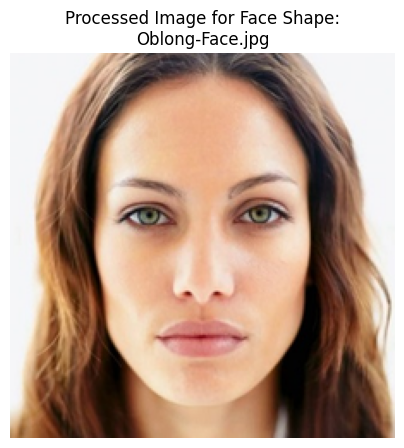

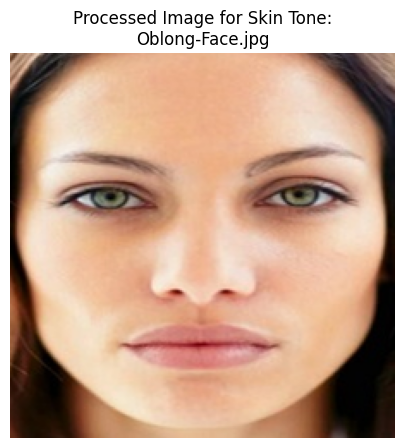

In [46]:
image_path = "./Oblong-Face.jpg"
dlib_processor = DlibProcessor()
preprocessed_face_shape, preprocessed_skin_tone = preprocessing_image(image_path, dlib_processor)

# Menampilkan gambar yang diproses (untuk Face Shape) jika berhasil
if preprocessed_face_shape is not None:
    processed_img_fs_display = (preprocessed_face_shape[0] * 255).astype(np.uint8)
    plt.figure(figsize=(5, 5))
    plt.imshow(processed_img_fs_display)
    plt.title(f"Processed Image for Face Shape:\n{os.path.basename(image_path)}")
    plt.axis('off')
    plt.show()

# Menampilkan gambar yang diproses (untuk Skin Tone) jika berhasil
if preprocessed_skin_tone is not None:
    processed_img_st_display = (preprocessed_skin_tone[0] * 255).astype(np.uint8)
    plt.figure(figsize=(5, 5))
    plt.imshow(processed_img_st_display)
    plt.title(f"Processed Image for Skin Tone:\n{os.path.basename(image_path)}")
    plt.axis('off')
    plt.show()

# **Predict Function**

In [58]:
class PredictionResources:
    """
    Kelas untuk menyimpan objek dan data yang dibutuhkan untuk prediksi.
    """
    def __init__(self, dlib_processor, model_face_shape, face_shape_labels, model_skin_tone, skin_tone_labels):
        self.dlib_processor = dlib_processor
        self.model_face_shape = model_face_shape
        self.face_shape_labels = face_shape_labels
        self.model_skin_tone = model_skin_tone
        self.skin_tone_labels = skin_tone_labels

dlib_processor_instance = DlibProcessor()
prediction_resources = PredictionResources(
    dlib_processor=dlib_processor_instance,
    model_face_shape=face_shape_model,  # Gunakan model yang sudah dimuat
    face_shape_labels=fs_labels,        # Gunakan label yang sudah dimuat
    model_skin_tone=skin_tone_model,    # Gunakan model yang sudah dimuat
    skin_tone_labels=st_labels          # Gunakan label yang sudah dimuat
)

DlibProcessor siap: Detektor dan predictor dlib diinisialisasi.


In [62]:
def _get_prediction_result(model_loaded, processed_image_batch, class_labels_list, task_name):
    """
    Melakukan inferensi model dan mengekstrak hasil prediksi (label dan probabilitas tunggal).
    """
    if model_loaded is None or processed_image_batch is None:
        return None, None

    predictions_batch = model_loaded.predict(processed_image_batch, verbose=0)
    predictions_single = predictions_batch[0]
    predicted_class_index = np.argmax(predictions_single)

    if not class_labels_list or predicted_class_index >= len(class_labels_list):
        predicted_label = "Tidak Diketahui"
    else:
        predicted_label = class_labels_list[predicted_class_index]

    return predicted_label, predictions_single[predicted_class_index]

In [71]:
def predict(image_path, resources):
    """
    Fungsi utama untuk melakukan prediksi face shape dan skin tone pada satu gambar,
    menggunakan objek PredictionResources, dengan output yang disederhanakan dan ditampilkan di plot.
    """
    try:
        original_image_pil = Image.open(image_path).convert("RGB")
    except Exception as e:
        print(f"Error: Gagal membuka gambar {os.path.basename(image_path)}: {e}")
        return

    # Preprocessing kedua input (Face Shape dan Skin Tone) menggunakan objek dari resources
    processed_face_shape_batch = preprocessing_face_shape(image_path, resources.dlib_processor)
    processed_skin_tone_batch = preprocessing_skin_tone(image_path, resources.dlib_processor)

    face_shape_result_text = "Prediksi Face Shape: Gagal"
    skin_tone_result_text = "Prediksi Skin Tone: Gagal"

    # Prediksi Face Shape menggunakan objek dari resources
    if processed_face_shape_batch is not None and resources.model_face_shape is not None:
        predicted_face_shape, prob_face_shape = _get_prediction_result(
            resources.model_face_shape, processed_face_shape_batch, resources.face_shape_labels, "Face Shape"
        )
        if predicted_face_shape:
            face_shape_result_text = f"Face Shape: {predicted_face_shape} (Prob: {prob_face_shape:.2f})"
    else:
        print(f"Peringatan: Preprocessing Face Shape gagal atau model tidak ada untuk {os.path.basename(image_path)}")

    # Prediksi Skin Tone menggunakan objek dari resources
    if processed_skin_tone_batch is not None and resources.model_skin_tone is not None:
        predicted_skin_tone, prob_skin_tone = _get_prediction_result(
            resources.model_skin_tone, processed_skin_tone_batch, resources.skin_tone_labels, "Skin Tone"
        )
        if predicted_skin_tone:
            skin_tone_result_text = f"Skin Tone: {predicted_skin_tone} (Prob: {prob_skin_tone:.2f})"
    else:
        print(f"Peringatan: Preprocessing Skin Tone gagal atau model tidak ada untuk {os.path.basename(image_path)}")

    # Tampilkan Gambar Input dan Hasil Prediksi
    plt.figure(figsize=(3, 4))
    plt.imshow(original_image_pil)
    plt.title(f"Gambar Input: {os.path.basename(image_path)}", fontsize=14)
    plt.axis('off')

    plt.figtext(0.5, 0.04, f"{face_shape_result_text}\n{skin_tone_result_text}",
                ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.8, "pad":5})

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

## **Testing**

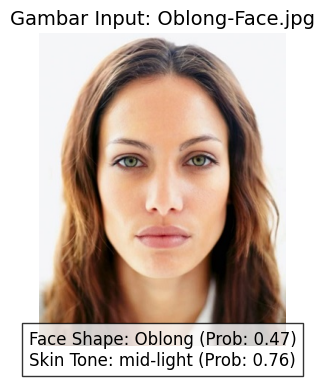

In [72]:
predict("./Oblong-Face.jpg", prediction_resources)

# **Upload & Predict Collab Testing**

In [79]:
def upload_and_predict_colab(resources: PredictionResources):
    """
    Meminta pengguna mengunggah satu atau beberapa gambar melalui antarmuka Colab,
    menyimpannya sementara, melakukan prediksi menggunakan fungsi predict() utama,
    lalu menghapusnya.
    """
    if resources.dlib_processor is None or resources.model_face_shape is None or resources.model_skin_tone is None:
        print("Sumber daya prediksi (DlibProcessor, model face shape, atau model skin tone) belum siap. Unggah dibatalkan.")
        return

    print("Silakan unggah gambar Anda (bisa lebih dari satu):")
    try:
        uploaded_files_dict = files.upload() # Menampilkan dialog upload Colab

        if not uploaded_files_dict:
            print("Tidak ada file yang diunggah.")
            return

        for file_name in uploaded_files_dict.keys():
            print(f'\nMemproses file unggahan: "{file_name}" ({len(uploaded_files_dict[file_name])} bytes)')

            # Simpan file yang diunggah ke _file system_ sementara Colab agar bisa dibaca path-nya
            temp_image_path = file_name
            with open(temp_image_path, 'wb') as f:
                f.write(uploaded_files_dict[file_name])

            # Panggil fungsi predict() utama yang sudah dibuat sebelumnya
            predict(temp_image_path, resources)

            # Hapus file lokal setelah selesai diproses (opsional, untuk kebersihan)
            try:
                os.remove(temp_image_path)
                print(f"File sementara '{temp_image_path}' telah dihapus.")
            except Exception as e_remove:
                print(f"Gagal menghapus file sementara '{temp_image_path}': {e_remove}")
    except Exception as e_upload:
        print(f"Terjadi error saat proses unggah atau prediksi: {e_upload}")


 MEMULAI SESI UNGGAH DAN PREDIKSI GAMBAR BARU 
Silakan unggah gambar Anda (bisa lebih dari satu):


Saving Oblong-Face.jpg to Oblong-Face (1).jpg
Saving oblongss.jpeg to oblongss.jpeg
Saving round-selfie-3.webp to round-selfie-3.webp
Saving F201302251003401592418921.jpg to F201302251003401592418921.jpg
Saving square.jpeg to square.jpeg

Memproses file unggahan: "Oblong-Face (1).jpg" (35239 bytes)


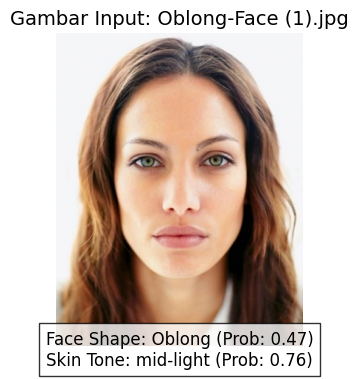

File sementara 'Oblong-Face (1).jpg' telah dihapus.

Memproses file unggahan: "oblongss.jpeg" (8086 bytes)


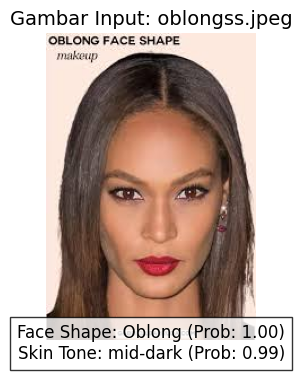

File sementara 'oblongss.jpeg' telah dihapus.

Memproses file unggahan: "round-selfie-3.webp" (42932 bytes)


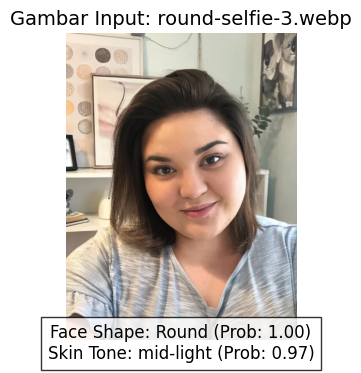

File sementara 'round-selfie-3.webp' telah dihapus.

Memproses file unggahan: "F201302251003401592418921.jpg" (43668 bytes)


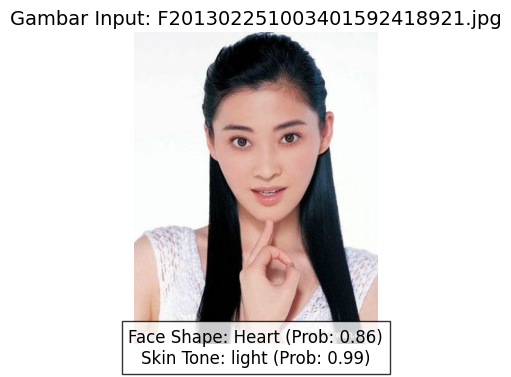

File sementara 'F201302251003401592418921.jpg' telah dihapus.

Memproses file unggahan: "square.jpeg" (5406 bytes)


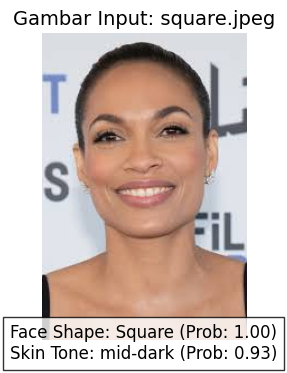

File sementara 'square.jpeg' telah dihapus.


In [83]:
print("\n===================================================")
print(" MEMULAI SESI UNGGAH DAN PREDIKSI GAMBAR BARU ")
print("===================================================")

# Panggil fungsi unggah dan prediksi Colab dengan objek resources
upload_and_predict_colab(prediction_resources)